## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.2, 0.3, 0.4, 0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(drop_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_______________________

50000/50000 [==============================] - 44s 872us/step - loss: 1.3376 - acc: 0.5236 - val_loss: 1.3596 - val_acc: 0.5114
Epoch 22/50
50000/50000 [==============================] - 44s 871us/step - loss: 1.3226 - acc: 0.5285 - val_loss: 1.3555 - val_acc: 0.5181
Epoch 23/50
50000/50000 [==============================] - 40s 795us/step - loss: 1.3111 - acc: 0.5333 - val_loss: 1.3386 - val_acc: 0.5203
Epoch 24/50
50000/50000 [==============================] - 40s 792us/step - loss: 1.2953 - acc: 0.5365 - val_loss: 1.3414 - val_acc: 0.5233
Epoch 25/50
50000/50000 [==============================] - 40s 796us/step - loss: 1.2807 - acc: 0.5423 - val_loss: 1.3269 - val_acc: 0.5243
Epoch 26/50
50000/50000 [==============================] - 42s 834us/step - loss: 1.2717 - acc: 0.5434 - val_loss: 1.3256 - val_acc: 0.5284
Epoch 27/50
50000/50000 [==============================] - 43s 851us/step - loss: 1.2564 - acc: 0.5524 - val_loss: 1.3334 - val_acc: 0.5275
Epoch 28/50
50000/50000 [=======

50000/50000 [==============================] - 24s 476us/step - loss: 1.4988 - acc: 0.4630 - val_loss: 1.4328 - val_acc: 0.4880
Epoch 18/50
50000/50000 [==============================] - 23s 469us/step - loss: 1.4829 - acc: 0.4719 - val_loss: 1.4299 - val_acc: 0.4949
Epoch 19/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.4662 - acc: 0.4757 - val_loss: 1.4098 - val_acc: 0.4979
Epoch 20/50
50000/50000 [==============================] - 23s 467us/step - loss: 1.4519 - acc: 0.4796 - val_loss: 1.4012 - val_acc: 0.5021
Epoch 21/50
50000/50000 [==============================] - 23s 470us/step - loss: 1.4396 - acc: 0.4861 - val_loss: 1.4120 - val_acc: 0.4995
Epoch 22/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.4270 - acc: 0.4895 - val_loss: 1.3860 - val_acc: 0.5065
Epoch 23/50
50000/50000 [==============================] - 23s 454us/step - loss: 1.4149 - acc: 0.4922 - val_loss: 1.3878 - val_acc: 0.5097
Epoch 24/50
50000/50000 [=======

50000/50000 [==============================] - 23s 457us/step - loss: 1.6696 - acc: 0.3973 - val_loss: 1.5570 - val_acc: 0.4451
Epoch 14/50
50000/50000 [==============================] - 23s 455us/step - loss: 1.6503 - acc: 0.4049 - val_loss: 1.5442 - val_acc: 0.4489
Epoch 15/50
50000/50000 [==============================] - 23s 455us/step - loss: 1.6372 - acc: 0.4114 - val_loss: 1.5307 - val_acc: 0.4542
Epoch 16/50
50000/50000 [==============================] - 23s 460us/step - loss: 1.6187 - acc: 0.4190 - val_loss: 1.5125 - val_acc: 0.4599
Epoch 17/50
50000/50000 [==============================] - 22s 447us/step - loss: 1.6053 - acc: 0.4244 - val_loss: 1.5075 - val_acc: 0.4599
Epoch 18/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.5910 - acc: 0.4274 - val_loss: 1.4932 - val_acc: 0.4666
Epoch 19/50
50000/50000 [==============================] - 22s 445us/step - loss: 1.5758 - acc: 0.4333 - val_loss: 1.4784 - val_acc: 0.4715
Epoch 20/50
50000/50000 [=======

50000/50000 [==============================] - 26s 519us/step - loss: 1.8500 - acc: 0.3239 - val_loss: 1.7255 - val_acc: 0.3849
Epoch 10/50
50000/50000 [==============================] - 26s 522us/step - loss: 1.8290 - acc: 0.3350 - val_loss: 1.6966 - val_acc: 0.3923
Epoch 11/50
50000/50000 [==============================] - 26s 517us/step - loss: 1.8059 - acc: 0.3440 - val_loss: 1.6803 - val_acc: 0.4029
Epoch 12/50
50000/50000 [==============================] - 25s 508us/step - loss: 1.7853 - acc: 0.3517 - val_loss: 1.6569 - val_acc: 0.4122
Epoch 13/50
50000/50000 [==============================] - 26s 520us/step - loss: 1.7651 - acc: 0.3577 - val_loss: 1.6508 - val_acc: 0.4124
Epoch 14/50
50000/50000 [==============================] - 26s 524us/step - loss: 1.7536 - acc: 0.3656 - val_loss: 1.6326 - val_acc: 0.4112
Epoch 15/50
50000/50000 [==============================] - 26s 513us/step - loss: 1.7359 - acc: 0.3718 - val_loss: 1.6137 - val_acc: 0.4253
Epoch 16/50
50000/50000 [=======

50000/50000 [==============================] - 26s 530us/step - loss: 2.0705 - acc: 0.2168 - val_loss: 1.9724 - val_acc: 0.2768
Epoch 6/50
50000/50000 [==============================] - 26s 527us/step - loss: 2.0362 - acc: 0.2298 - val_loss: 1.9358 - val_acc: 0.3027
Epoch 7/50
50000/50000 [==============================] - 27s 536us/step - loss: 2.0103 - acc: 0.2449 - val_loss: 1.9163 - val_acc: 0.3063
Epoch 8/50
50000/50000 [==============================] - 27s 532us/step - loss: 1.9871 - acc: 0.2530 - val_loss: 1.8847 - val_acc: 0.3125
Epoch 9/50
50000/50000 [==============================] - 26s 526us/step - loss: 1.9635 - acc: 0.2600 - val_loss: 1.8618 - val_acc: 0.3276
Epoch 10/50
50000/50000 [==============================] - 27s 530us/step - loss: 1.9512 - acc: 0.2675 - val_loss: 1.8450 - val_acc: 0.3341
Epoch 11/50
50000/50000 [==============================] - 26s 530us/step - loss: 1.9296 - acc: 0.2795 - val_loss: 1.8221 - val_acc: 0.3394
Epoch 12/50
50000/50000 [===========

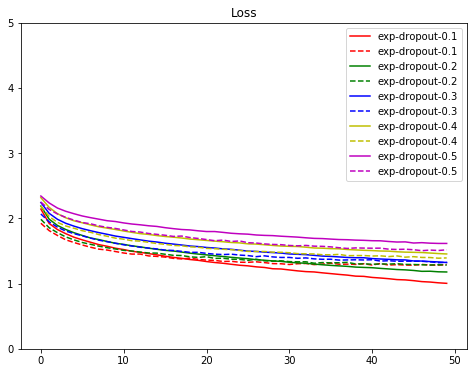

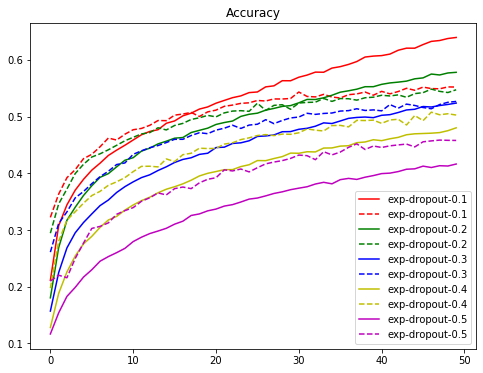

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()